# Abstract

### Introduction

[What is Zillow?](https://www.zillow.com/corp/About.htm)

Zillow is the leading real estate and rental marketplace dedicated to empowering consumers with data, inspiration and knowledge around the place they call home, and connecting them with the best local professionals who can help.

Zillow serves the full lifecycle of owning and living in a home: buying, selling, renting, financing, remodeling and more. It starts with Zillow's living database of more than 110 million U.S. homes - including homes for sale, homes for rent and homes not currently on the market, as well as Zestimate home values, Rent Zestimates and other home-related information. Zillow operates the most popular suite of mobile real estate apps, with more than two dozen apps across all major platforms.

### What are we trying to forecast?

The real estate market has always been through lows and highs in terms of house prices.

In this project, we are forecasting the listing prices per sqft of homes. This forecasting will equip buyers with the knowledge of favorable periods throughout year during which they can get the best deals for houses.

### Our Approach

We will be perfoming Time Series Analysis on our dataset using four different types of Machine Learning models - ARIMA, SARIMA, Facebook Prophet and a Hybrid ARIMA - ANN (Artificial Neural Networks) model.

### What is Time Series Analysis?

Time Series Analysis is a statistical technique that deals with time series data, or trend analysis.  Time series data means that data is in a series of  particular time periods or intervals. Time series analysis helps us understand time based patterns of a set of data points which can be used to forecast and make decisions based on the findings.


### Dataset 

The dataset we will be using in our project is a time series dataset which contains a set of observations with different values that a variable has at different times.

We are using time series dataset pertaining to the real estate market in the fifty states in the USA.

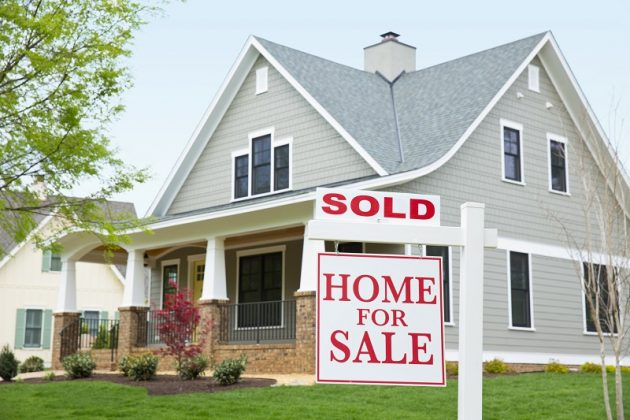

In [1]:
from IPython.display import Image
Image(filename='Home-sales-forecast.jpg')

#  Analysis

In [2]:
# importing libraries
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.ticker as tick
import squarify
from random import sample
import folium 
from folium import plugins
from folium.plugins import HeatMap
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
plotly.tools.set_credentials_file(username='ina19', api_key='aVYYQRBtSqq6uuHKeMcf')

#### Reading the State Time Series dataset

In [3]:
df = pd.read_csv("State_time_series.csv")

In [4]:
# Returns tuple of shape (Rows, columns) of dataframe/series
df.shape

(13026, 86)

####  Checking for null values in the dataset 

In [5]:
df.isnull().sum()

Date                                                                 0
RegionName                                                           0
DaysOnZillow_AllHomes                                             8568
HomesSoldAsForeclosuresRatio_AllHomes                             6325
InventorySeasonallyAdjusted_AllHomes                              8334
InventoryRaw_AllHomes                                             8334
MedianListingPricePerSqft_1Bedroom                                9629
MedianListingPricePerSqft_2Bedroom                                8647
MedianListingPricePerSqft_3Bedroom                                8618
MedianListingPricePerSqft_4Bedroom                                8548
MedianListingPricePerSqft_5BedroomOrMore                          8619
MedianListingPricePerSqft_AllHomes                                8583
MedianListingPricePerSqft_CondoCoop                               8922
MedianListingPricePerSqft_DuplexTriplex                           9623
Median

In [6]:
#print full summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13026 entries, 0 to 13025
Data columns (total 86 columns):
Date                                                             13026 non-null object
RegionName                                                       13026 non-null object
DaysOnZillow_AllHomes                                            4458 non-null float64
HomesSoldAsForeclosuresRatio_AllHomes                            6701 non-null float64
InventorySeasonallyAdjusted_AllHomes                             4692 non-null float64
InventoryRaw_AllHomes                                            4692 non-null float64
MedianListingPricePerSqft_1Bedroom                               3397 non-null float64
MedianListingPricePerSqft_2Bedroom                               4379 non-null float64
MedianListingPricePerSqft_3Bedroom                               4408 non-null float64
MedianListingPricePerSqft_4Bedroom                               4478 non-null float64
MedianListingPricePer

#### Displaying the top five rows


In [7]:
df.head()

Date  RegionName  DaysOnZillow_AllHomes  \
0  1996-04-30     Alabama                    NaN   
1  1996-04-30     Arizona                    NaN   
2  1996-04-30    Arkansas                    NaN   
3  1996-04-30  California                    NaN   
4  1996-04-30    Colorado                    NaN   

   HomesSoldAsForeclosuresRatio_AllHomes  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   InventorySeasonallyAdjusted_AllHomes  InventoryRaw_AllHomes  \
0                                   NaN                    NaN   
1                                   NaN                    NaN   
2                                   NaN                    NaN   
3                                   NaN                    NaN   
4                                   NaN                    NaN   

   MedianListingPricePerSqft_1Bedroom  MedianListingPricePerSqft_2Bedroom  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

   MedianListingPricePerSqft_3Bedroom  MedianListingPricePerSqft_4Bedroom  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

   ...  ZHVI_BottomTier  ZHVI_CondoCoop  ZHVI_MiddleTier  \
0  ...              NaN         99500.0          79500.0   
1  ...          67100.0         78900.0         103600.0   
2  ...          38400.0         70300.0          64400.0   
3  ...          95100.0        136100.0         157900.0   
4  ...          82700.0         99400.0         128100.0   

   ZHVI_SingleFamilyResidence  ZHVI_TopTier  ZRI_AllHomes  \
0                     79000.0      140200.0           NaN   
1                    107500.0      168700.0           NaN   
2                     64500.0      115200.0           NaN   
3                    162000.0      270600.0           NaN   
4                    133600.0      209300.0           NaN   

   ZRI_AllHomesPlusMultifamily  ZriPerSqft_AllHomes  \
0                          NaN                  NaN   
1                          NaN                  NaN   
2                          NaN                  NaN   
3                          NaN                  NaN   
4                          NaN                  NaN   

   Zri_MultiFamilyResidenceRental  Zri_SingleFamilyResidenceRental  
0                             NaN                              NaN  
1                             NaN                              NaN  
2                             NaN                              NaN  
3                             NaN                              NaN  
4                             NaN                              NaN  

[5 rows x 86 columns]

#### Displaying the bottom five rows

In [8]:
df.tail()

Date    RegionName  DaysOnZillow_AllHomes  \
13021  2017-08-31      Virginia                    NaN   
13022  2017-08-31    Washington                    NaN   
13023  2017-08-31  WestVirginia                    NaN   
13024  2017-08-31     Wisconsin                    NaN   
13025  2017-08-31       Wyoming                    NaN   

       HomesSoldAsForeclosuresRatio_AllHomes  \
13021                                 2.6026   
13022                                 2.0805   
13023                                 0.3122   
13024                                 0.9433   
13025                                    NaN   

       InventorySeasonallyAdjusted_AllHomes  InventoryRaw_AllHomes  \
13021                               39217.0                42952.0   
13022                               17986.0                23254.0   
13023                                9680.0                10468.0   
13024                               28198.0                32809.0   
13025                                4690.0                 5239.0   

       MedianListingPricePerSqft_1Bedroom  MedianListingPricePerSqft_2Bedroom  \
13021                          255.959227                          150.000000   
13022                          294.290861                          216.225207   
13023                          107.870370                           80.304061   
13024                          139.960992                          123.377384   
13025                          171.496617                          149.791667   

       MedianListingPricePerSqft_3Bedroom  MedianListingPricePerSqft_4Bedroom  \
13021                          145.424242                          147.681443   
13022                          192.307692                          182.703424   
13023                           91.092999                           93.516101   
13024                          122.988506                          114.902206   
13025                          135.649671                          147.134084   

       ...  ZHVI_BottomTier  ZHVI_CondoCoop  ZHVI_MiddleTier  \
13021  ...         133600.0        291200.0         245900.0   
13022  ...         202100.0        326500.0         342000.0   
13023  ...          62700.0        113000.0          99800.0   
13024  ...         106800.0        158900.0         167300.0   
13025  ...         137800.0        189300.0         195400.0   

       ZHVI_SingleFamilyResidence  ZHVI_TopTier  ZRI_AllHomes  \
13021                    236500.0      492100.0        1527.0   
13022                    343700.0      643100.0        1801.0   
13023                     99700.0      169700.0         874.0   
13024                    168200.0      277700.0        1180.0   
13025                    195300.0      307800.0        1181.0   

       ZRI_AllHomesPlusMultifamily  ZriPerSqft_AllHomes  \
13021                       1493.0                0.938   
13022                       1765.0                1.116   
13023                        874.0                0.672   
13024                       1151.0                0.918   
13025                       1145.0                0.916   

       Zri_MultiFamilyResidenceRental  Zri_SingleFamilyResidenceRental  
13021                          1717.0                           1431.0  
13022                          1669.0                           1784.0  
13023                           870.0                            874.0  
13024                          1062.0                           1161.0  
13025                          1046.0                           1153.0  

[5 rows x 86 columns]

#### Displaying the date range in the dataset and number of states in the USA


In [9]:
print('Date range:{} to {}'.format(df['Date'].min(),df['Date'].max()))
print('Number of States',df['RegionName'].nunique())

Date range:1996-04-30 to 2017-08-31
Number of States 52



#### Transforming the date to datetime format


In [10]:
df.Date = pd.to_datetime(df.Date)

#### Gathering data for year 2010 and onwards


In [11]:
df = df[df['Date'] >= '01-01-2010']
print('Date range:{} to {}'.format(df['Date'].min(),df['Date'].max()))
print('Number of States',df['RegionName'].nunique())

Date range:2010-01-31 00:00:00 to 2017-08-31 00:00:00
Number of States 52


#### Displaying the geographical location of the data


In [12]:
m = folium.Map(location=[38,-10], tiles="Mapbox Bright", zoom_start=1.5)
folium.Circle(
      location=[40, -106],
      popup='North America',
      radius=3000000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m

#### Median Listing Price Per Sqft Of All Homes In the United States Over the Past 8 Years


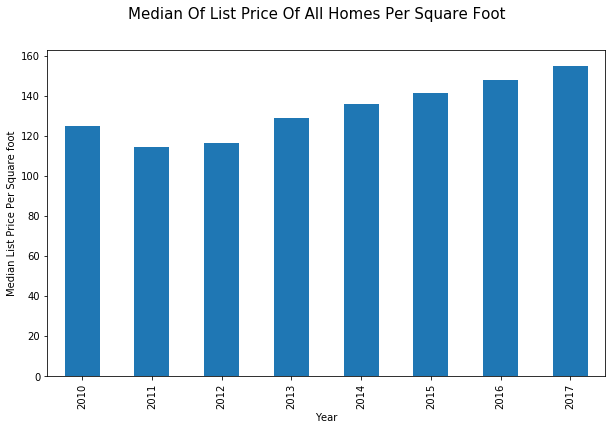

In [13]:
df1 = df.dropna(subset=['MedianListingPricePerSqft_AllHomes'], how='any')
df1.groupby(df1.Date.dt.year)['MedianListingPricePerSqft_AllHomes'].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Median Of List Price Of All Homes Per Square Foot', fontsize=15)
plt.ylabel('Median List Price Per Square foot')
plt.xlabel('Year')
plt.show()

#### SqFt Area of Different Types of Homes Listed on Zillow


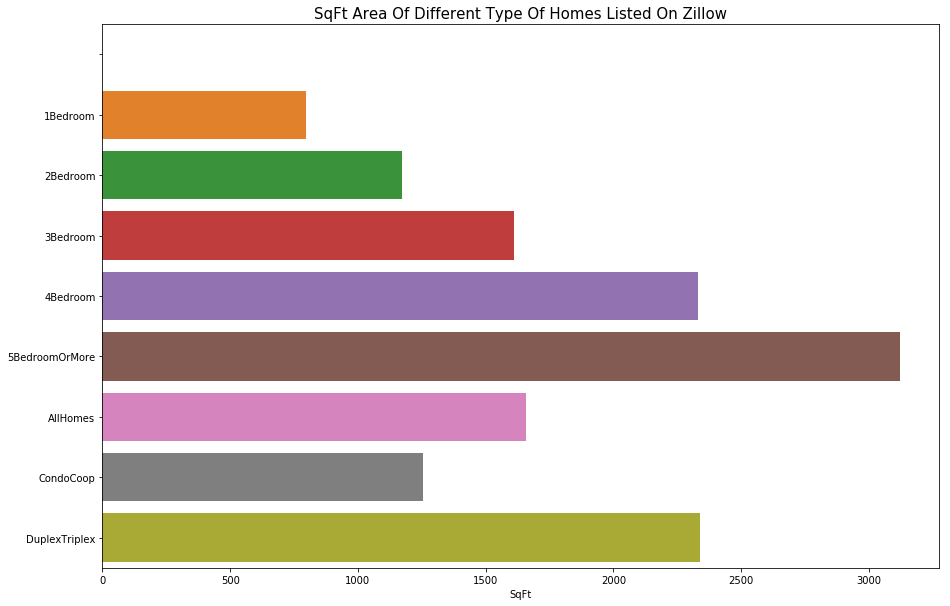

In [14]:
flat_type = []
flat_area = []
v1_features = df.iloc[:,14:23].columns
v2_features = df.iloc[:,5:14].columns
f, ax = plt.subplots(figsize=(15, 10))
for cn1, cn2 in zip(v1_features,v2_features):
    area = (df[cn1].dropna().mean()/df[cn2].dropna().mean())
    flat_type.append(str(cn2)[26:])
    flat_area.append(area)
g = sns.barplot( y = flat_type,
            x = flat_area)
ax.set_xlabel('SqFt')
plt.title("SqFt Area Of Different Type Of Homes Listed On Zillow", fontsize = 15)
plt.show()

#### Grouping data into monthly time intervals


In [15]:
state_month = df.resample('M',on='Date').mean()
state_month = state_month.reset_index()

####  Plotting the Median Listing Price Per Sqft with respect to the monthly time intervals


In [16]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_1Bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_2Bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_3Bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_4Bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_DuplexTriplex'], name = 'Duplex Triplex'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_SingleFamilyResidence'], name = 'Single Family'),
       ]

In [17]:
layout = {'title': 'Median Listing Price/sqft in $', 'font': dict(size=15),'xaxis':dict(range = ['2010-01-01','2017-10-01'])}

In [18]:
warnings.filterwarnings("ignore")
fig = dict(data=data, layout=layout)
py.iplot(fig)

#### Percentage of Sold Homes

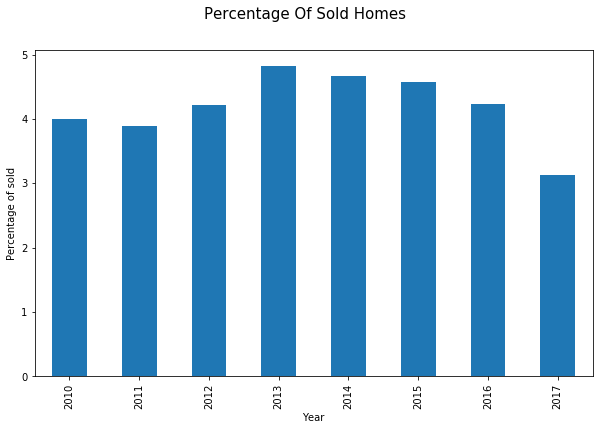

In [19]:
df2 = df.dropna(subset=['Turnover_AllHomes'], how='any')
df2.groupby(df2.Date.dt.year)['Turnover_AllHomes'].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle("Percentage Of Sold Homes", fontsize=15)
plt.ylabel('Percentage of sold')
plt.xlabel('Year')
plt.show()



#### Displaying Top Five Homes with Largest Median Listing Price Per SqFt Area


In [20]:
dfallhomes = df.groupby('RegionName', as_index=False)['MedianListingPricePerSqft_AllHomes'].\
    mean().dropna().sort_values('MedianListingPricePerSqft_AllHomes', ascending=False)
dfallhomes.head()

RegionName  MedianListingPricePerSqft_AllHomes
8   DistrictofColumbia                          458.253909
11              Hawaii                          402.616779
4           California                          264.384711
21       Massachusetts                          206.087124
32             NewYork                          174.116544


#### Displaying Top Five Homes with Lowest Median Listing Price Per SqFt Area


In [21]:
dfallhomes.tail(5)

RegionName  MedianListingPricePerSqft_AllHomes
3      Arkansas                           86.605089
36     Oklahoma                           86.356722
24  Mississippi                           86.343334
35         Ohio                           86.035765
14      Indiana                           81.160595

#### Displaying Trends of Median Listing Price Per SqFt Of All Homes Over The Years

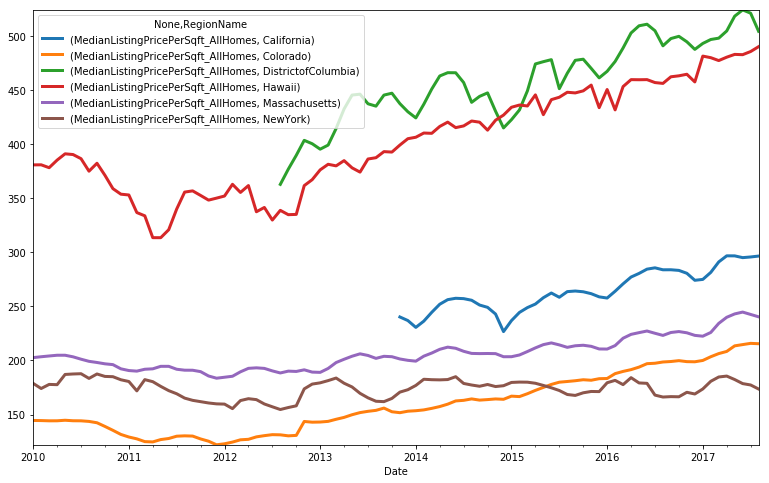

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
statelist = ['Hawaii', 'DistrictofColumbia', 'California', 'Massachusetts', 'NewYork', 'Colorado']
stateseries = pd.DataFrame(df[(df['RegionName'].\
    isin(statelist))][['Date','RegionName','MedianListingPricePerSqft_AllHomes']].\
    dropna().\
    groupby(['Date', 'RegionName'])['RegionName','MedianListingPricePerSqft_AllHomes'].mean().unstack())
stateseries.plot(figsize=(13,8), linewidth=3)
plt.margins(0)
plt.show()

In [23]:
#converting data to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

#### Seasonal Trends Of Median Listing Price Per SqFt Of All Homes

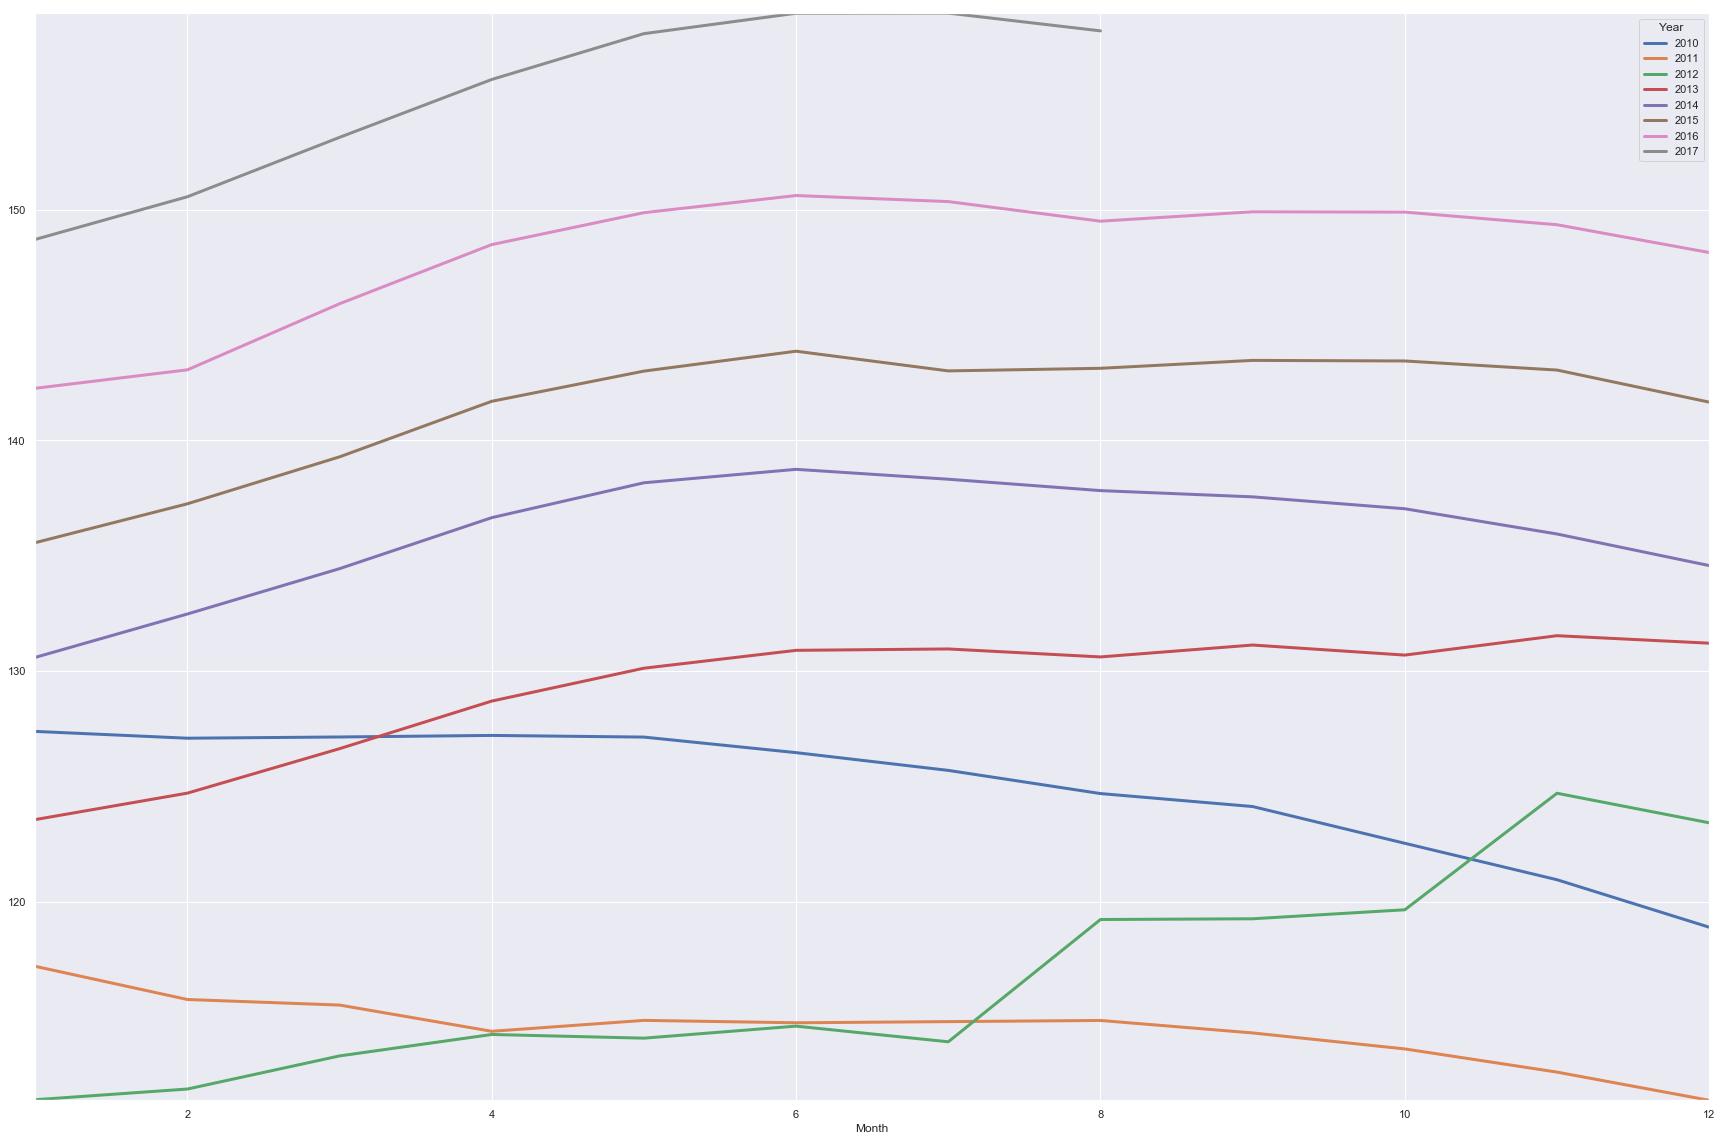

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
season = df

season['Date'] = df.Date
season['Year'] = df['Date'].dt.year
season['Month'] = df['Date'].dt.month
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'MedianListingPricePerSqft_AllHomes', aggfunc=np.mean)
spivot.plot(figsize=(30,20), linewidth=3)
plt.margins(0)
plt.show()

We can  interpret the following from the graph - 

1. House prices decreased from Year 2010 and further decreased in Year 2011. House prices picked up in Year 2012 past June.
2. The best time to sell houses is from the month of June through October (inclusive). House prices are at a peak during these months across all years.
3. The best time to buy a house is in the months of December and January.

## AutoCorrelation

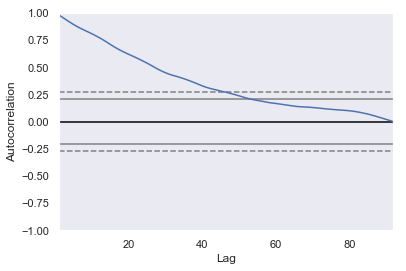

In [25]:
#plotting the auto correaltion graph
%matplotlib inline
import matplotlib.pyplot as plt

brtypes = df.groupby('Date')['Date','MedianListingPricePerSqft_1Bedroom', 'MedianListingPricePerSqft_2Bedroom','MedianListingPricePerSqft_3Bedroom','MedianListingPricePerSqft_4Bedroom','MedianListingPricePerSqft_5BedroomOrMore'].\
    mean().dropna()
pd.plotting.autocorrelation_plot(brtypes);
plt.show()

The above graph shows there is a positive correlation for all the bedroom types, but still it is not clear how each bedroom types are correlated. Let us find out.

In [26]:
# checking the correlation between Median Listing Price Per Sqft and number of bedrooms
brtypes.corr()

MedianListingPricePerSqft_1Bedroom  \
MedianListingPricePerSqft_1Bedroom                                  1.000000   
MedianListingPricePerSqft_2Bedroom                                  0.840396   
MedianListingPricePerSqft_3Bedroom                                  0.824212   
MedianListingPricePerSqft_4Bedroom                                  0.767990   
MedianListingPricePerSqft_5BedroomOrMore                            0.766047   

                                          MedianListingPricePerSqft_2Bedroom  \
MedianListingPricePerSqft_1Bedroom                                  0.840396   
MedianListingPricePerSqft_2Bedroom                                  1.000000   
MedianListingPricePerSqft_3Bedroom                                  0.997672   
MedianListingPricePerSqft_4Bedroom                                  0.989419   
MedianListingPricePerSqft_5BedroomOrMore                            0.987623   

                                          MedianListingPricePerSqft_3Bedroom  \
MedianListingPricePerSqft_1Bedroom                                  0.824212   
MedianListingPricePerSqft_2Bedroom                                  0.997672   
MedianListingPricePerSqft_3Bedroom                                  1.000000   
MedianListingPricePerSqft_4Bedroom                                  0.994737   
MedianListingPricePerSqft_5BedroomOrMore                            0.990124   

                                          MedianListingPricePerSqft_4Bedroom  \
MedianListingPricePerSqft_1Bedroom                                  0.767990   
MedianListingPricePerSqft_2Bedroom                                  0.989419   
MedianListingPricePerSqft_3Bedroom                                  0.994737   
MedianListingPricePerSqft_4Bedroom                                  1.000000   
MedianListingPricePerSqft_5BedroomOrMore                            0.996239   

                                          MedianListingPricePerSqft_5BedroomOrMore  
MedianListingPricePerSqft_1Bedroom                                        0.766047  
MedianListingPricePerSqft_2Bedroom                                        0.987623  
MedianListingPricePerSqft_3Bedroom                                        0.990124  
MedianListingPricePerSqft_4Bedroom                                        0.996239  
MedianListingPricePerSqft_5BedroomOrMore                                  1.000000

The above table confirms the correlation and to be more specific let us remove the seasonality from the data and see. This is called order of correlation.

In [27]:
#checking the order difference in correlation
brtypes.diff().corr()

MedianListingPricePerSqft_1Bedroom  \
MedianListingPricePerSqft_1Bedroom                                  1.000000   
MedianListingPricePerSqft_2Bedroom                                  0.727023   
MedianListingPricePerSqft_3Bedroom                                  0.761538   
MedianListingPricePerSqft_4Bedroom                                  0.704150   
MedianListingPricePerSqft_5BedroomOrMore                            0.621515   

                                          MedianListingPricePerSqft_2Bedroom  \
MedianListingPricePerSqft_1Bedroom                                  0.727023   
MedianListingPricePerSqft_2Bedroom                                  1.000000   
MedianListingPricePerSqft_3Bedroom                                  0.950050   
MedianListingPricePerSqft_4Bedroom                                  0.927538   
MedianListingPricePerSqft_5BedroomOrMore                            0.900698   

                                          MedianListingPricePerSqft_3Bedroom  \
MedianListingPricePerSqft_1Bedroom                                  0.761538   
MedianListingPricePerSqft_2Bedroom                                  0.950050   
MedianListingPricePerSqft_3Bedroom                                  1.000000   
MedianListingPricePerSqft_4Bedroom                                  0.957994   
MedianListingPricePerSqft_5BedroomOrMore                            0.903049   

                                          MedianListingPricePerSqft_4Bedroom  \
MedianListingPricePerSqft_1Bedroom                                  0.704150   
MedianListingPricePerSqft_2Bedroom                                  0.927538   
MedianListingPricePerSqft_3Bedroom                                  0.957994   
MedianListingPricePerSqft_4Bedroom                                  1.000000   
MedianListingPricePerSqft_5BedroomOrMore                            0.932855   

                                          MedianListingPricePerSqft_5BedroomOrMore  
MedianListingPricePerSqft_1Bedroom                                        0.621515  
MedianListingPricePerSqft_2Bedroom                                        0.900698  
MedianListingPricePerSqft_3Bedroom                                        0.903049  
MedianListingPricePerSqft_4Bedroom                                        0.932855  
MedianListingPricePerSqft_5BedroomOrMore                                  1.000000

First order difference in correlation still has better correlation between bedroom types. You can see 1 Bedroom & 2 Bedroom are highly correlated than 1 bedroom & 5 bedroom.

## Forecasting using Time Series Analysis

We will be performing Time Series Analysis using the Median Listing Price Per SqFt variable.

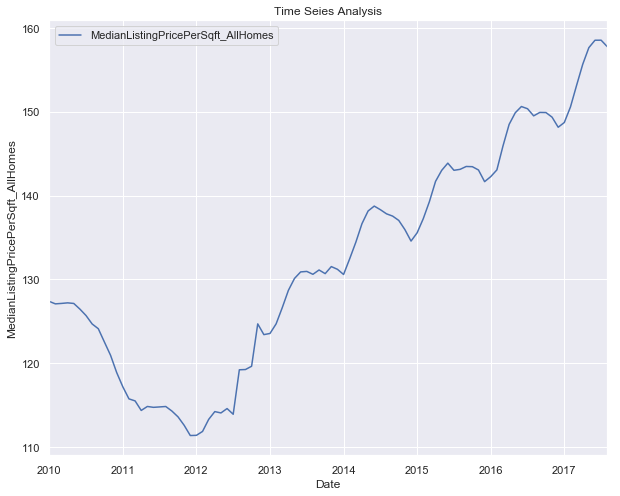

In [28]:
allhomes = df.groupby('Date')['Date','MedianListingPricePerSqft_AllHomes'].mean().dropna()
allhomes.plot(figsize=(10,8))
plt.title('Time Seies Analysis')
plt.xlabel('Date')
plt.ylabel('MedianListingPricePerSqft_AllHomes')
plt.show()

The above graphs shows a clear trend and it also shows seasonality.


# ARIMA forecast model

ARIMA is an acronym for AutoRegressive Integrated Moving Average. It is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data to better understand the data or to forecast.

This acronym is descriptive, capturing the key aspects of the model itself. They are -

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.
d: The number of times that the raw observations are differenced, also called the degree of differencing.
q: The size of the moving average window, also called the order of moving average.
A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.

A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.

Adopting an ARIMA model for a time series assumes that the underlying process that generated the observations is an ARIMA process. This may seem obvious, but helps to motivate the need to confirm the assumptions of the model in the raw observations and in the residual errors of forecasts from the model.


A simple way to identify the p-lag is to draw the autocorrelation plot.

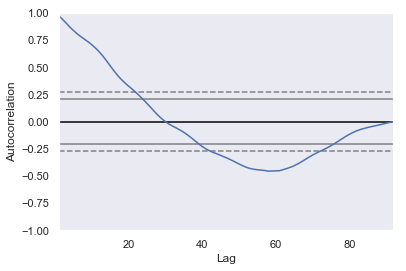

In [29]:

pd.plotting.autocorrelation_plot(allhomes);

From the above graph, we can select 15 as lag and then start 0, need to run and check the optimimum parameters.

In [30]:
import warnings
warnings.filterwarnings("ignore")

                                       ARIMA Model Results                                       
Dep. Variable:     D2.MedianListingPricePerSqft_AllHomes   No. Observations:                   90
Model:                                   ARIMA(15, 2, 0)   Log Likelihood                -129.646
Method:                                          css-mle   S.D. of innovations              0.993
Date:                                   Fri, 26 Apr 2019   AIC                            293.291
Time:                                           22:20:45   BIC                            335.788
Sample:                                       03-31-2010   HQIC                           310.428
                                            - 08-31-2017                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

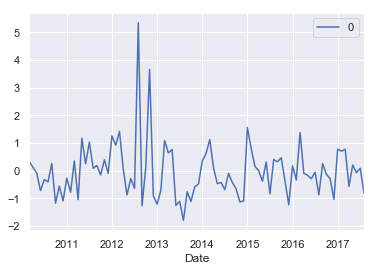

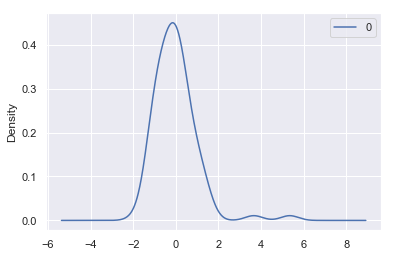

0
count  90.000000
mean   -0.022154
std     1.006077
min    -1.796616
25%    -0.676195
50%    -0.096229
75%     0.342568
max     5.349963

In [33]:
#fitting the ARIMA model 
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

model = ARIMA(allhomes, order=(15,2,0))
model_fit = model.fit(disp=0)

# printing the model summary results
print(model_fit.summary())

#plotting the residuals graph for fitted ARIMA model
residuals = DataFrame(model_fit.resid)

residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()
residuals.describe()

Residuals plot shows there are residual errors in the forecast and the KDE plot clearly shows that the curve is not in the zero. This can be further optimized by changing values based on the ARIMA model results summary.

Let us use forecast() method of ARIMA to forecast the data. Before predicting for the next year, let us validate the model first. We have splitted the dataset into Train & Test with 40% as test data.

Test RMSE: 0.819


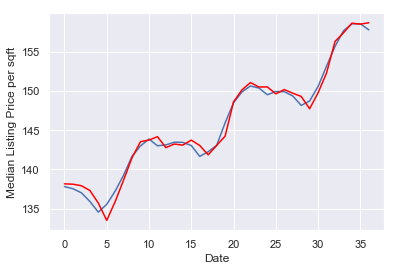

In [34]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = allhomes.values
train_size = int(len(X) * 0.60)
train, test = X[0:train_size], X[train_size:]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(15,2,0))
	model_fit = model.fit()
	fcast = model_fit.forecast()[0]
	predictions.append(fcast)
	history.append(test[t])

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)

plt.xlabel('Date')
plt.ylabel('Median Listing Price per sqft')
plt.plot(predictions, color='red')
plt.show()


In the above graph the blue line is the actual value and the red line is the predicted value. The predictions are almost equivalent to the test data.

In [36]:
#forecasting the ARIMA results
forecast = list()
model = ARIMA(history, order=(15,2,0))
model_fit = model.fit(disp=0)
forecast = model_fit.forecast(steps=12)[0]
for fcast in forecast:
    print(fcast)

157.8792165146061
158.03903188122467
157.62211774128926
157.71531869921617
158.26139980273706
159.78582606625255
161.90681515799514
164.31867085406952
166.32266539124421
167.30255641630524
167.57433808286973
167.5411656278441


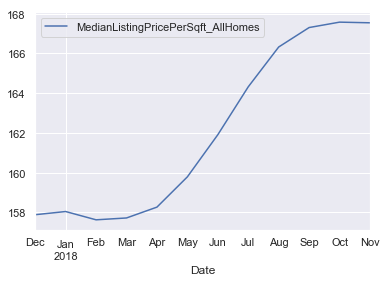

In [37]:
#plotting the graph which shows the prediction for next 12 months
future = pd.date_range('12/31/2017', periods=12,freq='M')
futdict = {'Date' : future, 'MedianListingPricePerSqft_AllHomes' : forecast}
ts = pd.DataFrame(futdict)
ts.set_index('Date', inplace=True)

ts.plot();


The above is the prediction for next 12 months and you can see the graph shows the seasonality as earlier like the price is reducing in Dec 2017 and then it is getting reduced in Oct/Nov 2018

# SARIMA forecast model

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

In [38]:
#importing the libraries and determining the parameters
import itertools
#p = [14, 15, 16]
#d = [14, 15, 16]
#q = [14, 15, 16]
p = range(2, 4)
d = range(0, 3)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

#printing parameter combinations for Seasonal ARIMA
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (2, 0, 1) x (2, 0, 1, 12)
SARIMAX: (2, 0, 1) x (2, 0, 2, 12)
SARIMAX: (2, 0, 2) x (2, 1, 0, 12)
SARIMAX: (2, 0, 2) x (2, 1, 1, 12)


In [ ]:


import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(allhomes,
                                               order = param,
                                               seasonal_order = param_seasonal,
                                               enforce_stationarity = False,
                                               enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA {}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

#### SARIMA Model 1

In [39]:
import statsmodels.api as sm
#fitting the Seasonal ARIMA model
mod = sm.tsa.statespace.SARIMAX(allhomes,
                                    order = (2, 0, 4),
                                    seasonal_order = (3, 1, 2, 12),
                                    enforce_stationarity = False,
                                    enforce_invertibility = False)
results = mod.fit()

# printing the model results
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6179      0.080     20.325      0.000       1.462       1.774
ar.L2         -0.6234      0.077     -8.088      0.000      -0.774      -0.472
ma.L1         -1.0056      1.287     -0.782      0.434      -3.527       1.516
ma.L2          0.1820      0.942      0.193      0.847      -1.664       2.028
ma.L3          0.4998      0.880      0.568      0.570      -1.224       2.224
ma.L4          0.0164      0.225      0.073      0.942      -0.424       0.457
ar.S.L12       0.1384      0.048      2.855      0.004       0.043       0.233
ar.S.L24      -0.0646      0.043     -1.519      0.129      -0.148       0.019
ar.S.L36       0.2504      0.057      4.430      0.000       0.140       0.361
ma.S.L12      -0.8471      5.708     -0.148      0.882     -12.034      10.340
ma.S.L24      -0.2220      0.844     -0.263      0.7

The following graphs are used to check if the residuals of our model are uncorrelated and normally distributed with zero-mean.In this case, our model diagnostics suggests that the model residuals are normally distributed

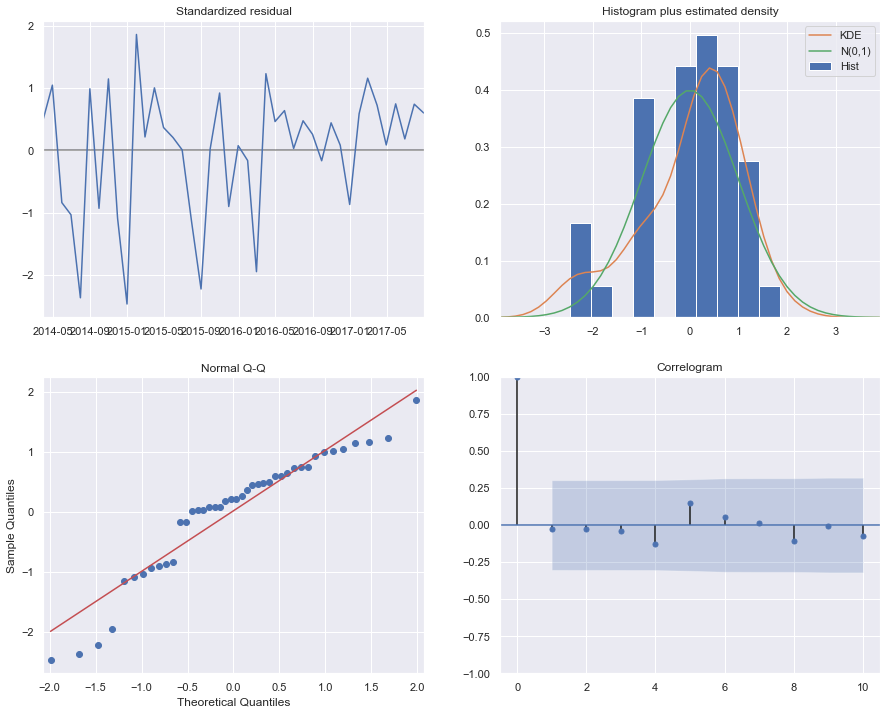

In [40]:
#plotting the residual graphs 
results.plot_diagnostics(figsize=(15, 12))
plt.show()

From the above graph, we can see that

1. The histogram has minor difference with KDE
2. Linear regression can be improved
3. There are still positive correlation, this can be optimized further.

#### Validate the model

In [41]:
# splitting into train and test
train_size = int(len(allhomes) * 0.60)
train, test = allhomes[0:train_size], allhomes[train_size:]


In [42]:
#predicting the results
pred = results.get_prediction(start = test.iloc[0].name, dynamic = False)
pred_ci = pred.conf_int()

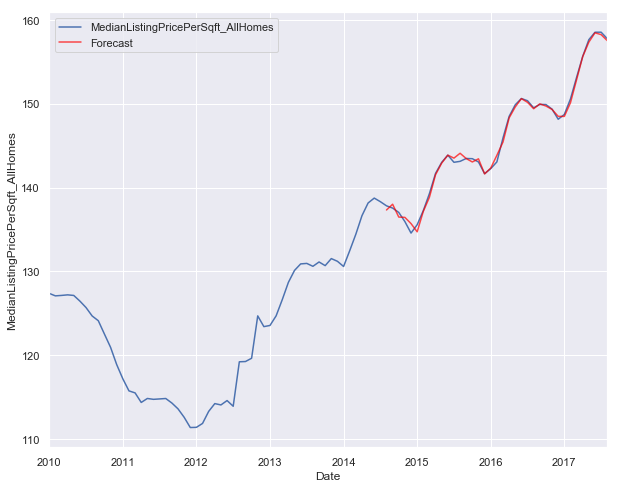

In [43]:
#plotting the actual vs Forecast graph
ax = allhomes.plot(label='actual', figsize=(10,8))
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=0.7, color='red')
ax.set_xlabel('Date')
ax.set_ylabel('MedianListingPricePerSqft_AllHomes')
plt.legend()
plt.show()

The graph above shows that our predictions are very much sync with the actual data

#### Calculating the mean squared error for this model

In [44]:
y_forecasted = pred.predicted_mean
y_series = pd.Series(allhomes['MedianListingPricePerSqft_AllHomes'].values, index = allhomes.index)

y_truth = y_series.iloc[49:]

mse = ((y_forecasted - y_truth) ** 2).mean()

print(mse)

0.17430884277543876


The mean squared error is 0.174, so it means the forecast gives us a good value. 

#### Predicting for the future

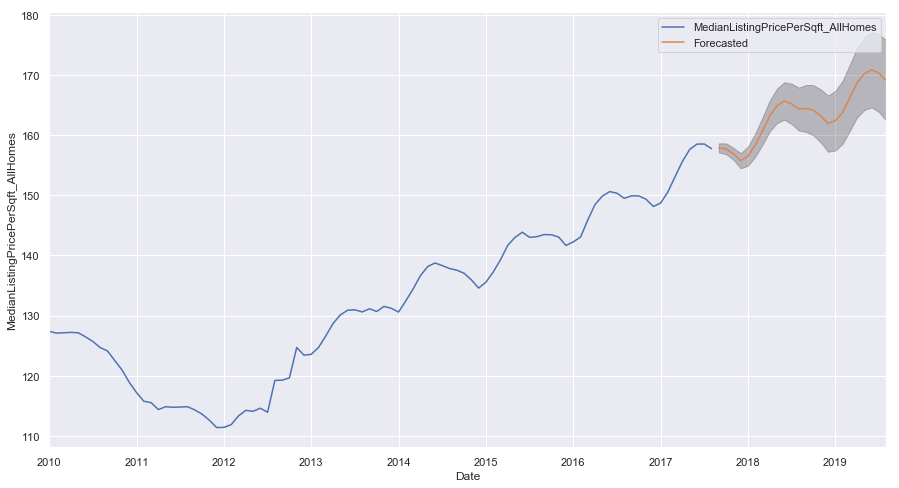

In [45]:
pred_uc = results.get_forecast(steps=24)

pred_ci = pred_uc.conf_int()

ax = allhomes.plot(label = 'Actual', figsize=(15,8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecasted')
ax.fill_between(pred_ci.index,
                   pred_ci.iloc[:,0],
                   pred_ci.iloc[:,1],
                   color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('MedianListingPricePerSqft_AllHomes')
plt.legend()
plt.show()

From the above graph it can be observed that the forecast for next 24 months and the confidence interval are better and not too much variance.

#### SARIMA Model 2

In [46]:
import statsmodels.api as sm
#fitting the Seasonal ARIMA model
mod = sm.tsa.statespace.SARIMAX(allhomes,
                                    order = (2, 0, 4),
                                    seasonal_order = (2, 1, 1, 12),
                                    enforce_stationarity = False,
                                    enforce_invertibility = False)
results = mod.fit()

# printing the model results
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5695      2.063      0.761      0.447      -2.474       5.613
ar.L2         -0.5701      2.058     -0.277      0.782      -4.604       3.464
ma.L1         -1.2561      5.225     -0.240      0.810     -11.497       8.985
ma.L2         -0.6360      2.609     -0.244      0.807      -5.750       4.478
ma.L3          0.3054      0.572      0.534      0.593      -0.815       1.426
ma.L4         -0.6225      1.889     -0.330      0.742      -4.324       3.079
ar.S.L12      -0.7017      0.062    -11.287      0.000      -0.824      -0.580
ar.S.L24      -0.3679      0.059     -6.187      0.000      -0.484      -0.251
ma.S.L12       0.9321      1.998      0.467      0.641      -2.984       4.848
sigma2         0.1161      0.745      0.156      0.876      -1.344       1.576


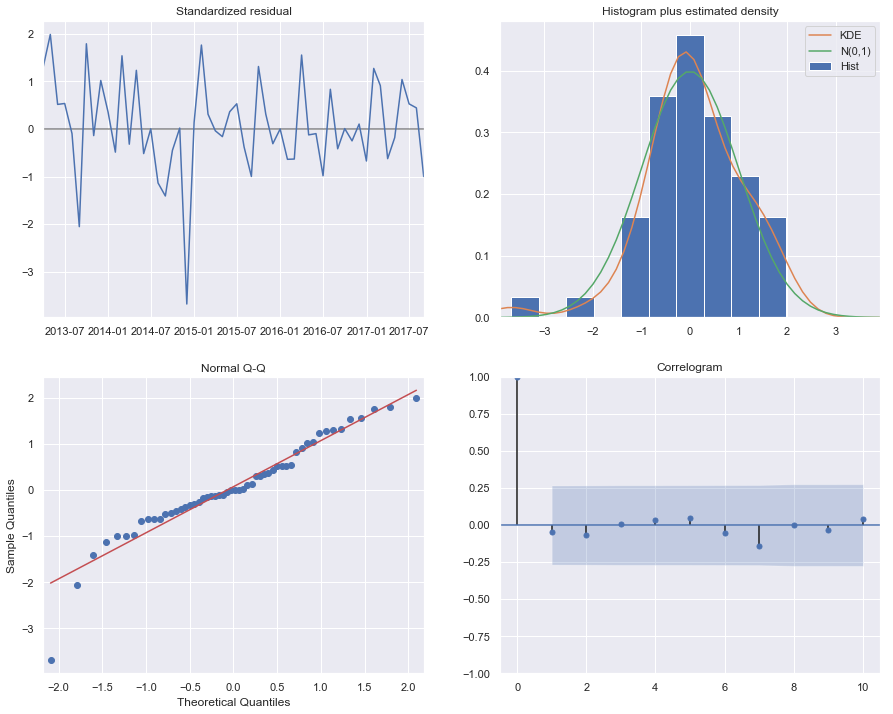

In [47]:
#plotting the residual graphs 
results.plot_diagnostics(figsize=(15, 12))
plt.show()

#### Validate the model

In [48]:
# splitting into train and test
train_size = int(len(allhomes) * 0.60)
train, test = allhomes[0:train_size], allhomes[train_size:]

In [49]:
#predicting the results
pred = results.get_prediction(start = test.iloc[0].name, dynamic = False)
pred_ci = pred.conf_int()

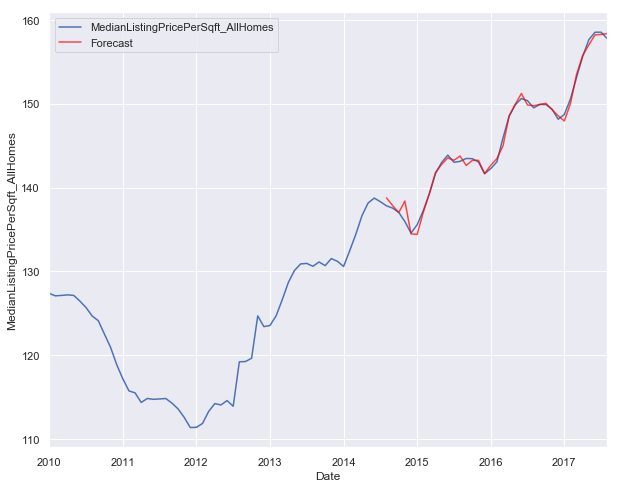

In [50]:
#plotting the actual vs Forecast graph
ax = allhomes.plot(label='actual', figsize=(10,8))
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=0.7, color='red')
ax.set_xlabel('Date')
ax.set_ylabel('MedianListingPricePerSqft_AllHomes')
plt.legend()
plt.show()

#### Calculating the mean squared error for this model

In [51]:
y_forecasted = pred.predicted_mean
y_series = pd.Series(allhomes['MedianListingPricePerSqft_AllHomes'].values, index = allhomes.index)

y_truth = y_series.iloc[49:]

mse = ((y_forecasted - y_truth) ** 2).mean()

print(mse)

0.3756325643725539


#### Predicting for the future

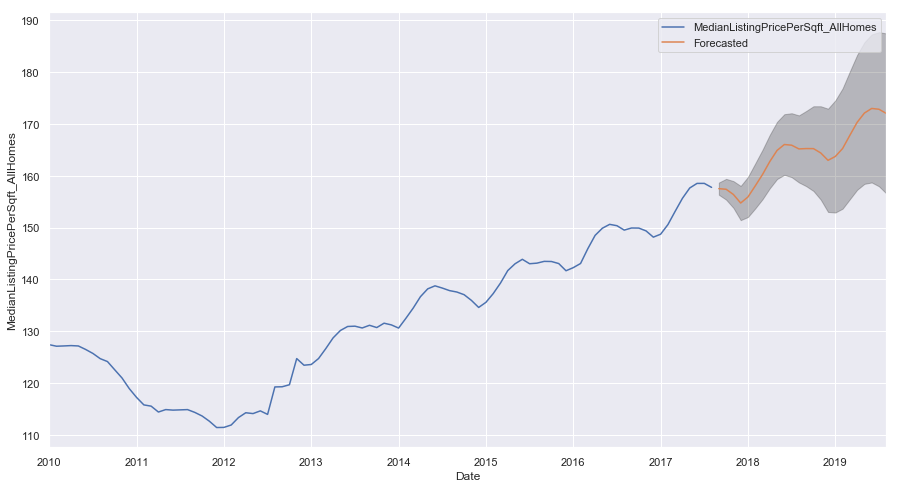

In [52]:
pred_uc = results.get_forecast(steps=24)

pred_ci = pred_uc.conf_int()

ax = allhomes.plot(label = 'Actual', figsize=(15,8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecasted')
ax.fill_between(pred_ci.index,
                   pred_ci.iloc[:,0],
                   pred_ci.iloc[:,1],
                   color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('MedianListingPricePerSqft_AllHomes')
plt.legend()
plt.show()

#### SARIMA Model 3

In [53]:
import statsmodels.api as sm
#fitting the Seasonal ARIMA model
mod = sm.tsa.statespace.SARIMAX(allhomes,
                                    order = (2, 0, 4),
                                    seasonal_order = (3, 0, 2, 12),
                                    enforce_stationarity = False,
                                    enforce_invertibility = False)
results = mod.fit()

# printing the model results
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5067   5.35e-27   2.82e+26      0.000       1.507       1.507
ar.L2         -0.5048         -0        inf      0.000      -0.505      -0.505
ma.L1         -0.1515   2.12e-24  -7.13e+22      0.000      -0.151      -0.151
ma.L2          0.0009   1.39e-24   6.31e+20      0.000       0.001       0.001
ma.L3          0.1566   2.17e-24   7.22e+22      0.000       0.157       0.157
ma.L4         -0.3574    1.5e-24  -2.38e+23      0.000      -0.357      -0.357
ar.S.L12       0.1840    2.5e-28   7.35e+26      0.000       0.184       0.184
ar.S.L24       0.4867   8.71e-28   5.59e+26      0.000       0.487       0.487
ar.S.L36       0.4605   6.44e-28   7.15e+26      0.000       0.460       0.460
ma.S.L12    4.017e+11   1.23e-30   3.28e+41      0.000    4.02e+11    4.02e+11
ma.S.L24    5.447e+11   9.17e-35   5.94e+45      0.0

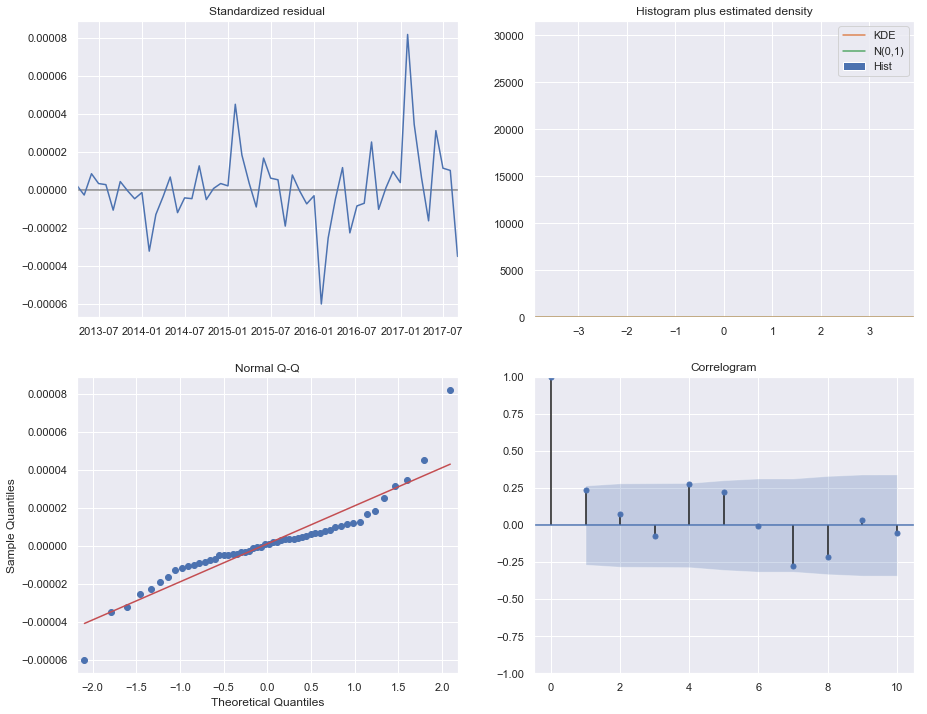

In [54]:
#plotting the residual graphs 
results.plot_diagnostics(figsize=(15, 12))
plt.show()

#### Validate the model

In [55]:
# splitting into train and test
train_size = int(len(allhomes) * 0.60)
train, test = allhomes[0:train_size], allhomes[train_size:]

In [56]:
#predicting the results
pred = results.get_prediction(start = test.iloc[0].name, dynamic = False)
pred_ci = pred.conf_int()

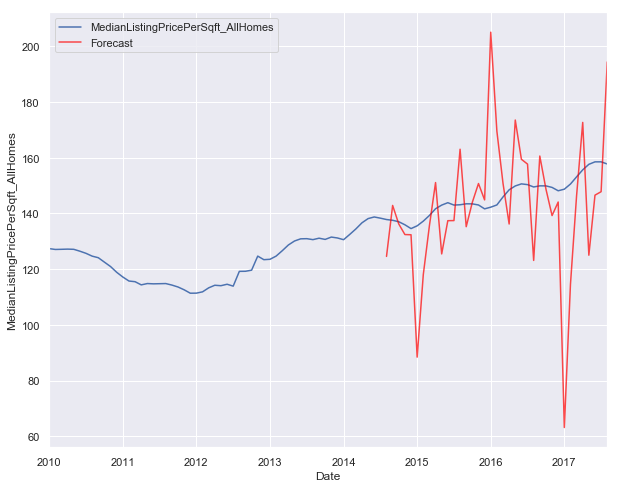

In [57]:
#plotting the actual vs Forecast graph
ax = allhomes.plot(label='actual', figsize=(10,8))
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=0.7, color='red')
ax.set_xlabel('Date')
ax.set_ylabel('MedianListingPricePerSqft_AllHomes')
plt.legend()
plt.show()

#### Calculating the mean squared error for this model

In [58]:
y_forecasted = pred.predicted_mean
y_series = pd.Series(allhomes['MedianListingPricePerSqft_AllHomes'].values, index = allhomes.index)

y_truth = y_series.iloc[49:]

mse = ((y_forecasted - y_truth) ** 2).mean()

print(mse)

590.9739593236156


#### Conclusion from the SARIMA models

Out of the 3 above models for SARIMA,we can observe that the Model 1 with order = (2, 0, 4) and seasonal_order = (3, 1, 2,12)12 
gives the lowest Mean squared error value of 0.174 and also the actual values are very much aligned with predicted values.
Hence Model1 for SARIMA gives us the best results.

# Prophet Forecast Model
Prophet, released by Facebook,  is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [59]:
StateDF=df[['Date','MedianListingPricePerSqft_AllHomes']]
StateDF.dropna(inplace=True)
#prophet expects data in the format as DF('ds','y)
StateDF['ds']=StateDF['Date']
StateDF['y']=np.log(StateDF['MedianListingPricePerSqft_AllHomes'])

In [60]:
#getting insights of data
del StateDF['Date']
del StateDF['MedianListingPricePerSqft_AllHomes']
StateDF.head()

ds         y
8243 2010-01-31  4.561315
8244 2010-01-31  5.032316
8246 2010-01-31  4.477337
8248 2010-01-31  4.973699
8249 2010-01-31  5.168514

In [61]:
train=StateDF[:len(StateDF)-40]
train.shape

(4403, 2)

In [62]:
test=StateDF[len(StateDF)-40:]
test.shape

(40, 2)

Importing the Prophet Libraries and and fitting the model by instantiating a new Prophet object

In [63]:
from fbprophet import Prophet
m = Prophet()
m.fit(StateDF);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made.

In [64]:
future = m.make_future_dataframe(periods=40) # days for test split
future.tail()

ds
4478 2017-10-06
4479 2017-10-07
4480 2017-10-08
4481 2017-10-09
4482 2017-10-10

The predict method will assign each row in future a predicted value which it names yhat. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [65]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
4478 2017-10-06  4.955008    4.511322    5.394336
4479 2017-10-07  4.954340    4.529386    5.389538
4480 2017-10-08  4.954596    4.529838    5.398807
4481 2017-10-09  4.955780    4.506598    5.394272
4482 2017-10-10  4.957868    4.519330    5.430642

We can now plot the forecast by calling the Prophet.plot method and passing in  forecast dataframe.

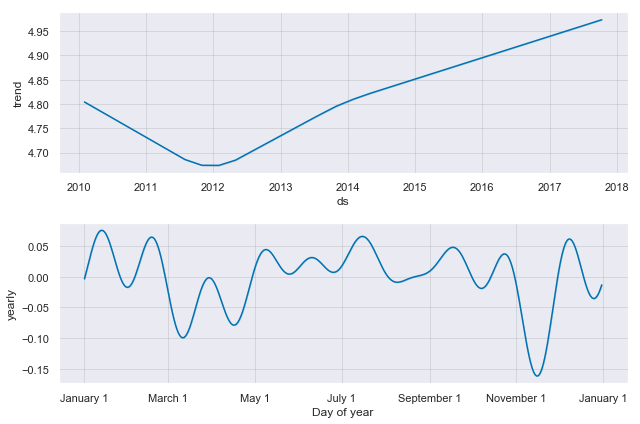

In [66]:
m.plot_components(forecast);

#### Cross validate the Prophet model

Using the cross_validation() function on the model and specify the forecast horizon with the horizon parameter.
We then call performance_metrics() to get a table with various prediction performance metrics.

In [67]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m, horizon='90 days')
df_p = performance_metrics(df_cv)
df_p.head(5)

INFO:fbprophet:Making 54 forecasts with cutoffs between 2010-11-21 00:00:00 and 2017-06-02 00:00:00


horizon       mse      rmse       mae      mape  coverage
3502 11 days  0.121294  0.348273  0.263652  0.053576  0.875161
3507 11 days  0.123241  0.351057  0.265007  0.053788  0.873874
3501 11 days  0.123196  0.350994  0.264821  0.053749  0.873874
3500 11 days  0.122961  0.350658  0.264471  0.053681  0.875161
3503 11 days  0.123429  0.351325  0.264998  0.053770  0.873874

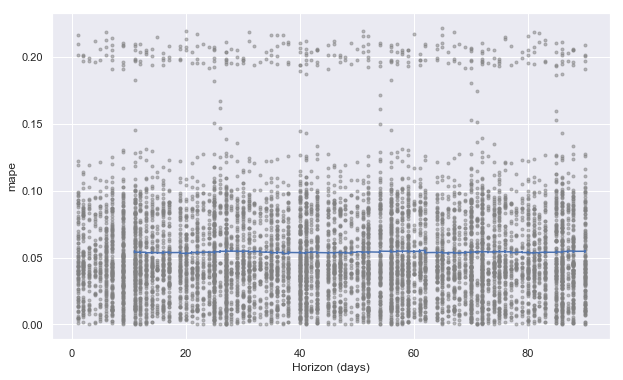

In [68]:
#plotting the cross validation graph
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mape')

# ARIMA- ANN Hybrid Forecast Model

Artificial neural networks (ANN) is a framework for many different machine learning algorithms to work together and process complex data inputs. They have a flexible nonlinear modeling capability.

#### ARIMA - ANN Hybrid Forecast Model
ARIMA models are good for time series analysis but the disadvantage is the pre-assumed linear form of the model. The major advantage of artificial neural networks (ANNs) is their flexible nonlinear modeling capability.

By combining ARIMA with ANN models, complex autocorrelation structures in the data can be modeled more accurately.
In Hybrid – ANN model, the ARIMA model is used to analyze the linearity of data. Then a neural network is created to model the residuals from the ARIMA model. These residuals will contain information about the non linearity that has not been captured by the ARIMA model. The results from the neural network will be used as predictions of the ARIMA model error terms.

In [69]:
# importing Keras libraries for implementing neural network
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from sklearn import preprocessing
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


Filling the null values with mean values of Median Listing Price_All Homes

In [70]:
df["MedianListingPrice_AllHomes"] = df.groupby("RegionName")["MedianListingPrice_AllHomes"].transform(lambda x: x.fillna(x.mean()))

In [71]:
#printing the Median Listing values
k=df['MedianListingPrice_AllHomes']
print((k))

8243     167500.000000
8244     238500.000000
8245     243211.228261
8246     139900.000000
8247     443809.652174
8248     239900.000000
8249     273613.200000
8250     229900.000000
8251     478833.016393
8252     239595.608696
8253     189631.071429
8254     479900.000000
8255     211374.719298
8256     189932.065217
8257     132997.821429
8258     132500.000000
8259     149000.000000
8260     148900.000000
8261     170000.000000
8262     205000.000000
8263     239000.000000
8264     273900.000000
8265     140133.000000
8266     164400.000000
8267     150000.000000
8268     139000.000000
8269     249000.000000
8270     159352.745283
8271     235021.065217
8272     239900.000000
             ...      
12996    409900.000000
12997    169000.000000
12998    240500.000000
12999    172900.000000
13000    169000.000000
13001    295000.000000
13002    195000.000000
13003    289900.000000
13004    275000.000000
13005    299000.000000
13006    219900.000000
13007    339900.000000
13008    24

In [72]:
#Checking for null values
k.isnull().sum()
k.dropna(inplace=True)

Fitting the ARIMA model as a part of ARIMA-ANN Hybrid Model

In [73]:
size = int(len(k) * 0.60)#split into test and train
percentage = 0.6
series = k.tolist()
size = int(len(series) * 0.66)
train, test = series[0:size], series[size:len(series)]
model = ARIMA(train , order = (1,0,0))
model_fit = model.fit()

Plotting THE ACF and PACF graphs to display the results

Autocorrelation and partial autocorrelation plots are heavily used in time series analysis and forecasting.

These are plots that graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps.

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

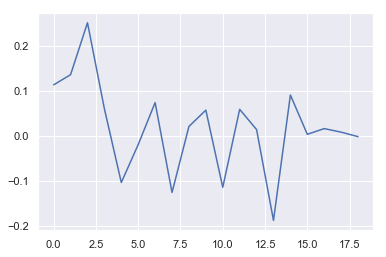

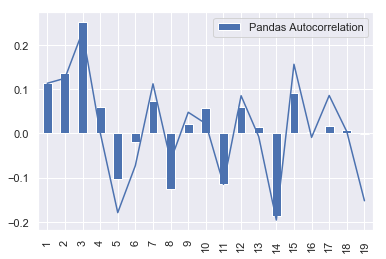

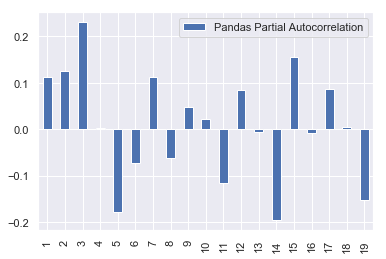

In [74]:
from statsmodels.tsa.stattools import acf, pacf
acf_1 = acf(series)[1:20]
plt.plot(acf_1)
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ["Pandas Autocorrelation"]
test_df.index += 1
test_df.plot(kind='bar')
pacf_1 = pacf(series)[1:20]
plt.plot(pacf_1)
plt.show()
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')


#### ARIMA Rolling Forecast

Rolling forecasts are commonly used to compare time series models.

predicted=206583.762946, expected=259900.000000
predicted=216611.691583, expected=169000.000000
predicted=208312.875770, expected=249900.000000
predicted=215689.931293, expected=189900.000000
predicted=210224.496510, expected=169900.000000
predicted=208390.885762, expected=159900.000000
predicted=207459.745049, expected=225000.000000
predicted=213393.624788, expected=259900.000000
predicted=216587.091611, expected=229500.000000
predicted=213823.835179, expected=249900.000000
predicted=215695.067183, expected=259000.000000
predicted=216542.434638, expected=148700.000000
predicted=206470.838514, expected=157500.000000
predicted=207247.057256, expected=235000.000000
predicted=214322.453657, expected=169900.000000
predicted=208378.072876, expected=249900.000000
predicted=215673.814387, expected=234000.000000
predicted=214234.027470, expected=147000.000000
predicted=206298.743112, expected=405000.000000
predicted=229695.929888, expected=325062.000000
predicted=222619.071435, expected=264900

predicted=224562.649288, expected=279900.000000
predicted=219144.662553, expected=259900.000000
predicted=217337.331166, expected=499000.000000
predicted=239475.515193, expected=226600.000000
predicted=214382.174088, expected=185000.000000
predicted=210549.852934, expected=525000.000000
predicted=241757.803893, expected=210000.000000
predicted=212938.201665, expected=199900.000000
predicted=212015.188732, expected=139900.000000
predicted=206530.222912, expected=155000.000000
predicted=207878.062721, expected=163987.500000
predicted=208678.131383, expected=159000.000000
predicted=208200.701547, expected=180800.000000
predicted=210183.665508, expected=200000.000000
predicted=211937.673266, expected=270000.000000
predicted=218361.847321, expected=359900.000000
predicted=226689.763778, expected=139900.000000
predicted=206490.138234, expected=219900.000000
predicted=213796.563524, expected=160000.000000
predicted=208315.853804, expected=149900.000000
predicted=207366.920005, expected=279900

predicted=220270.915106, expected=162500.000000
predicted=209379.709299, expected=236000.000000
predicted=216181.123613, expected=247000.000000
predicted=217207.484045, expected=299000.000000
predicted=222047.757572, expected=215000.000000
predicted=214272.373447, expected=319999.000000
predicted=224017.635093, expected=215000.000000
predicted=214300.929460, expected=136000.000000
predicted=206972.776121, expected=159500.000000
predicted=209122.451218, expected=280000.000000
predicted=220294.679541, expected=175000.000000
predicted=210578.215621, expected=275000.000000
predicted=219822.702041, expected=200000.000000
predicted=212901.929179, expected=196900.000000
predicted=212611.351162, expected=169900.000000
predicted=210108.809847, expected=247950.000000
predicted=217313.473618, expected=284900.000000
predicted=220744.665408, expected=236700.000000
predicted=216305.213108, expected=274900.000000
predicted=219851.122259, expected=291900.000000
predicted=221457.578121, expected=150000

predicted=210618.168713, expected=239900.000000
predicted=217472.132994, expected=169900.000000
predicted=210890.467670, expected=264500.000000
predicted=219775.220267, expected=249000.000000
predicted=218333.062751, expected=149900.000000
predicted=209027.559241, expected=439900.000000
predicted=236110.701806, expected=350000.000000
predicted=227929.210468, expected=269000.000000
predicted=220329.519388, expected=264900.000000
predicted=219960.294111, expected=489000.000000
predicted=241363.450681, expected=249350.000000
predicted=218591.985174, expected=187235.000000
predicted=212675.075778, expected=549000.000000
predicted=247034.228797, expected=224900.000000
predicted=216337.987417, expected=179900.000000
predicted=212081.746732, expected=129900.000000
predicted=207330.328454, expected=145000.000000
predicted=208723.426159, expected=147500.000000
predicted=208930.540504, expected=152900.000000
predicted=209417.062138, expected=183900.000000
predicted=212354.413092, expected=199900

predicted=221196.098890, expected=374900.000000
predicted=231468.503713, expected=135918.000000
predicted=208443.131594, expected=224900.000000
predicted=216974.435093, expected=156900.000000
predicted=210446.602445, expected=147737.000000
predicted=209542.074519, expected=276900.000000
predicted=221936.575993, expected=172500.000000
predicted=211935.292439, expected=239000.000000
predicted=218298.844078, expected=249900.000000
predicted=219349.829197, expected=286000.000000
predicted=222824.550201, expected=207900.000000
predicted=215348.862037, expected=339000.000000
predicted=227914.052563, expected=219900.000000
predicted=216527.098952, expected=134495.000000
predicted=208345.753521, expected=162900.000000
predicted=211039.319885, expected=295000.000000
predicted=223687.795296, expected=174900.000000
predicted=212210.859356, expected=269900.000000
predicted=221279.452418, expected=216900.000000
predicted=216229.767755, expected=194900.000000
predicted=214128.684438, expected=167500

predicted=221058.180837, expected=299900.000000
predicted=225516.691391, expected=245000.000000
predicted=220101.853811, expected=289900.000000
predicted=224561.851429, expected=310000.000000
predicted=226593.232278, expected=159000.000000
predicted=211622.200822, expected=179000.000000
predicted=213588.741319, expected=240000.000000
predicted=219631.069576, expected=175000.000000
predicted=213191.503144, expected=279000.000000
predicted=223485.441231, expected=254900.500000
predicted=221115.801010, expected=156900.000000
predicted=211417.742374, expected=479990.000000
predicted=243231.481245, expected=365490.000000
predicted=232206.127132, expected=289900.000000
predicted=224734.011028, expected=268900.000000
predicted=222658.271839, expected=569000.000000
predicted=252933.702771, expected=258000.000000
predicted=221690.317873, expected=205000.000000
predicted=216357.669667, expected=590000.000000
predicted=255085.428569, expected=240000.000000
predicted=219958.703971, expected=202495

predicted=216378.442317, expected=139900.000000
predicted=210726.637175, expected=159000.000000
predicted=212657.356510, expected=149950.000000
predicted=211706.536229, expected=161000.000000
predicted=212819.308919, expected=196500.000000
predicted=216457.075426, expected=219900.000000
predicted=218859.693798, expected=279900.000000
predicted=225033.048651, expected=389000.000000
predicted=236331.840171, expected=149900.000000
predicted=211720.414843, expected=224900.000000
predicted=219408.973900, expected=159900.000000
predicted=212736.422904, expected=150000.000000
predicted=211697.996345, expected=285000.000000
predicted=225549.657471, expected=172000.000000
predicted=213973.381102, expected=259500.000000
predicted=222928.798637, expected=259900.000000
predicted=222980.929402, expected=289900.000000
predicted=226071.226590, expected=215000.000000
predicted=218404.083780, expected=329000.000000
predicted=230092.070851, expected=228000.000000
predicted=219760.381681, expected=139900

predicted=220267.226089, expected=134900.000000
predicted=210934.486318, expected=169900.000000
predicted=214536.492639, expected=319000.000000
predicted=229971.792893, expected=169900.000000
predicted=214565.651583, expected=269000.000000
predicted=224791.130016, expected=215000.000000
predicted=219226.457789, expected=199900.000000
predicted=217666.664621, expected=174000.000000
predicted=214987.465317, expected=249900.000000
predicted=222813.612119, expected=305990.000000
predicted=228616.082815, expected=239900.000000
predicted=221808.516936, expected=267495.000000
predicted=224665.447821, expected=299950.000000
predicted=228039.567929, expected=145000.000000
predicted=212039.833491, expected=169900.000000
predicted=214589.729528, expected=230000.000000
predicted=220790.689522, expected=175000.000000
predicted=215110.365432, expected=266900.000000
predicted=224591.898559, expected=259900.000000
predicted=223881.442823, expected=150000.000000
predicted=212544.942460, expected=474750

predicted=250305.906549, expected=395000.000000
predicted=239576.220259, expected=309000.000000
predicted=230431.872480, expected=260000.000000
predicted=225184.617716, expected=560900.000000
predicted=257710.148405, expected=279900.000000
predicted=227441.022204, expected=225000.000000
predicted=221509.823698, expected=605000.000000
predicted=262663.012744, expected=261990.000000
predicted=225593.907285, expected=219900.000000
predicted=221044.351935, expected=161997.500000
predicted=214774.285819, expected=174500.000000
predicted=216112.631559, expected=170000.000000
predicted=215612.135681, expected=174900.000000
predicted=216130.057942, expected=203900.000000
predicted=219266.638946, expected=229900.000000
predicted=222084.322190, expected=299900.000000
predicted=229682.940689, expected=424900.000000
predicted=243362.799681, expected=166100.000000
predicted=215220.039637, expected=249000.000000
predicted=224203.000112, expected=174500.000000
predicted=216130.813919, expected=167900

predicted=230803.571919, expected=195000.000000
predicted=219438.601704, expected=289900.000000
predicted=230222.703621, expected=275000.000000
predicted=228546.666589, expected=299000.000000
predicted=231295.642468, expected=219900.000000
predicted=222302.876930, expected=339900.000000
predicted=235963.226898, expected=249000.000000
predicted=225639.008176, expected=154900.000000
predicted=214931.247857, expected=176360.000000
predicted=217357.332048, expected=349999.000000
predicted=237103.955729, expected=189900.000000
predicted=218927.155778, expected=299500.000000
predicted=231359.424622, expected=230685.500000
predicted=223566.062772, expected=213800.000000
predicted=221651.712823, expected=190000.000000
predicted=218949.303893, expected=269000.000000
predicted=227904.990710, expected=330000.000000
predicted=234847.863343, expected=249500.000000
predicted=225727.951653, expected=294999.000000
predicted=230906.273128, expected=349000.000000
predicted=237090.328482, expected=150000

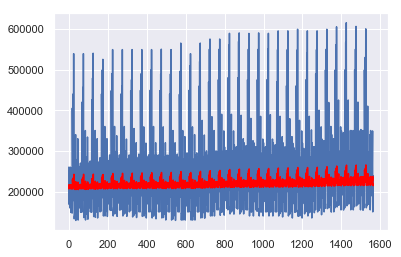

In [75]:
"""
Arima Rolling Forecast
"""
predicted1, resid_test1 = [], []
history = train
for t in range(len(test)):
    model1 = ARIMA(history, order=(1,0,0))
    model_fit = model1.fit(disp=0)
    output1 = model_fit.forecast()
    yhat = output1[0]
    resid_test1.append(test[t] - output1[0])
    predicted1.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
test_resid1 = []
for i in resid_test1:
    test_resid1.append(i[0])
error = mean_squared_error(test, predicted1)
print('Test MSE: %.3f' % error)
plt.plot(test)
plt.plot(predicted1, color='red')
plt.show()

After ARIMA modeling, the residual component is calculated so that it can be input to the ANN model as ANN model will handle the non-linear component of the model.

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3036
Model:                     ARMA(9, 0)   Log Likelihood              -38391.842
Method:                       css-mle   S.D. of innovations          75095.813
Date:                Fri, 26 Apr 2019   AIC                          76805.684
Time:                        22:54:47   BIC                          76871.886
Sample:                             0   HQIC                         76829.482
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.123e+05   1691.706    125.466      0.000    2.09e+05    2.16e+05
ar.L1.y        0.0534      0.018      2.942      0.003       0.018       0.089
ar.L2.y        0.1783      0.018      9.837      0.0

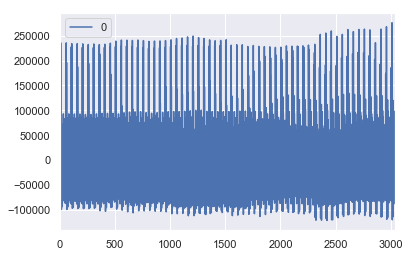

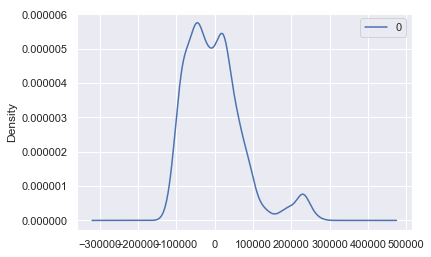

                   0
count    3036.000000
mean      -16.175859
std     75115.829895
min   -121005.889564
25%    -53349.738202
50%     -9845.241997
75%     35559.554853
max    275850.987992


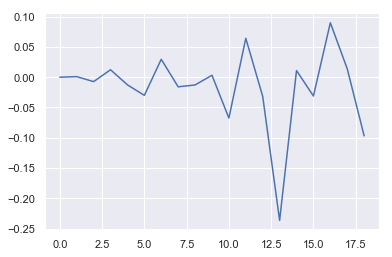

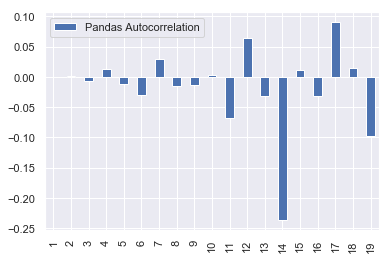

In [78]:
"""
Residual Diagnostics
"""
train, test = series[0:size], series[size:len(series)]
model1 = ARIMA(train, order=(9,0,0))
model_fit = model1.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals1 = pd.DataFrame(model_fit.resid)
residuals1.plot()
plt.show()
residuals1.plot(kind='kde')
plt.show()
print(residuals1.describe())
#plot the acf for the residuals
acf_1 = acf(model_fit.resid)[1:20]
plt.plot(acf_1)
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ["Pandas Autocorrelation"]
test_df.index += 1
test_df.plot(kind='bar')
#from the acf obtained from the residuals we concule that 
#there is still a nonlinear relationship among the residuals

Hybrid ARIMA-ANN model: The Hybrid Model is implemented and MSE is a metric to evaluate the fitness of the model. We have implemented the Sequential model of Keras. It allows us to create models layer-by-layer

In [79]:
"""
Hybrid Model
"""
window_size = 50
def make_model(window_size):
    model1 = Sequential()
    model1.add(Dense(50, input_dim=window_size, init="uniform",
    activation="tanh"))
    model1.add(Dense(25, init="uniform", activation="tanh"))
    model1.add(Dense(1))
    model1.add(Activation("linear"))
    model1.compile(loss='mean_squared_error', optimizer='adam')
    return model1



model1 = make_model(50)

min_max_scaler1 = preprocessing.MinMaxScaler()
train = np.array(train).reshape(-1,1)

train_scaled = min_max_scaler1.fit_transform(train) 
train_X,train_Y = [],[]
for i in range(0 , len(train_scaled) - window_size):
    train_X.append(train_scaled[i:i+window_size])
    train_Y.append(train_scaled[i+window_size])

new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1))
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)

model1.fit(new_train_X,new_train_Y, nb_epoch=500, batch_size=512, validation_split = .05)

Train on 2836 samples, validate on 150 samples
Epoch 1/500
2836/2836 [==============================] - 1s 185us/step - loss: 0.0595 - val_loss: 0.0378
Epoch 2/500
2836/2836 [==============================] - 0s 6us/step - loss: 0.0398 - val_loss: 0.0384
Epoch 3/500
2836/2836 [==============================] - 0s 6us/step - loss: 0.0330 - val_loss: 0.0358
Epoch 4/500
2836/2836 [==============================] - 0s 9us/step - loss: 0.0313 - val_loss: 0.0295
Epoch 5/500
2836/2836 [==============================] - 0s 5us/step - loss: 0.0267 - val_loss: 0.0265
Epoch 6/500
2836/2836 [==============================] - 0s 6us/step - loss: 0.0232 - val_loss: 0.0227
Epoch 7/500
2836/2836 [==============================] - 0s 7us/step - loss: 0.0194 - val_loss: 0.0179
Epoch 8/500
2836/2836 [==============================] - 0s 6us/step - loss: 0.0154 - val_loss: 0.0143
Epoch 9/500
2836/2836 [==============================] - 0s 8us/step - loss: 0.0119 - val_loss: 0.0111
Epoch 10/500
2836/2836 [

2836/2836 [==============================] - 0s 8us/step - loss: 1.7401e-04 - val_loss: 1.4483e-04
Epoch 76/500
2836/2836 [==============================] - 0s 7us/step - loss: 1.7565e-04 - val_loss: 1.4326e-04
Epoch 77/500
2836/2836 [==============================] - 0s 8us/step - loss: 1.7503e-04 - val_loss: 1.4312e-04
Epoch 78/500
2836/2836 [==============================] - 0s 6us/step - loss: 1.7633e-04 - val_loss: 1.4365e-04
Epoch 79/500
2836/2836 [==============================] - 0s 6us/step - loss: 1.7558e-04 - val_loss: 1.3857e-04
Epoch 80/500
2836/2836 [==============================] - 0s 8us/step - loss: 1.7570e-04 - val_loss: 1.4105e-04
Epoch 81/500
2836/2836 [==============================] - 0s 9us/step - loss: 1.7843e-04 - val_loss: 1.4684e-04
Epoch 82/500
2836/2836 [==============================] - 0s 8us/step - loss: 1.8152e-04 - val_loss: 2.0373e-04
Epoch 83/500
2836/2836 [==============================] - 0s 11us/step - loss: 1.8196e-04 - val_loss: 1.4366e-04
Epoc

2836/2836 [==============================] - 0s 8us/step - loss: 1.7576e-04 - val_loss: 1.7568e-04
Epoch 148/500
2836/2836 [==============================] - 0s 6us/step - loss: 1.9966e-04 - val_loss: 2.1337e-04
Epoch 149/500
2836/2836 [==============================] - 0s 6us/step - loss: 1.9784e-04 - val_loss: 3.0238e-04
Epoch 150/500
2836/2836 [==============================] - 0s 7us/step - loss: 2.1378e-04 - val_loss: 3.0311e-04
Epoch 151/500
2836/2836 [==============================] - 0s 7us/step - loss: 2.1956e-04 - val_loss: 1.8483e-04
Epoch 152/500
2836/2836 [==============================] - 0s 7us/step - loss: 1.9347e-04 - val_loss: 1.3584e-04
Epoch 153/500
2836/2836 [==============================] - 0s 8us/step - loss: 1.9468e-04 - val_loss: 1.3832e-04
Epoch 154/500
2836/2836 [==============================] - 0s 7us/step - loss: 1.8738e-04 - val_loss: 1.4646e-04
Epoch 155/500
2836/2836 [==============================] - 0s 8us/step - loss: 1.8610e-04 - val_loss: 1.4445e-

2836/2836 [==============================] - 0s 6us/step - loss: 1.7898e-04 - val_loss: 1.3918e-04
Epoch 220/500
2836/2836 [==============================] - 0s 5us/step - loss: 1.8670e-04 - val_loss: 1.3795e-04
Epoch 221/500
2836/2836 [==============================] - 0s 6us/step - loss: 1.7622e-04 - val_loss: 1.4629e-04
Epoch 222/500
2836/2836 [==============================] - 0s 6us/step - loss: 1.7522e-04 - val_loss: 1.4600e-04
Epoch 223/500
2836/2836 [==============================] - 0s 6us/step - loss: 1.9164e-04 - val_loss: 1.4265e-04
Epoch 224/500
2836/2836 [==============================] - 0s 7us/step - loss: 1.8084e-04 - val_loss: 1.8420e-04
Epoch 225/500
2836/2836 [==============================] - 0s 7us/step - loss: 1.7840e-04 - val_loss: 1.6443e-04
Epoch 226/500
2836/2836 [==============================] - 0s 7us/step - loss: 1.8066e-04 - val_loss: 1.6292e-04
Epoch 227/500
2836/2836 [==============================] - 0s 6us/step - loss: 1.9067e-04 - val_loss: 1.4961e-

2836/2836 [==============================] - 0s 6us/step - loss: 1.8004e-04 - val_loss: 1.4740e-04
Epoch 292/500
2836/2836 [==============================] - 0s 5us/step - loss: 1.8158e-04 - val_loss: 1.6450e-04
Epoch 293/500
2836/2836 [==============================] - 0s 6us/step - loss: 2.0726e-04 - val_loss: 1.4447e-04
Epoch 294/500
2836/2836 [==============================] - 0s 6us/step - loss: 1.8094e-04 - val_loss: 1.8473e-04
Epoch 295/500
2836/2836 [==============================] - 0s 8us/step - loss: 1.7601e-04 - val_loss: 1.5607e-04
Epoch 296/500
2836/2836 [==============================] - 0s 6us/step - loss: 1.7822e-04 - val_loss: 1.7617e-04
Epoch 297/500
2836/2836 [==============================] - 0s 6us/step - loss: 1.8410e-04 - val_loss: 2.4922e-04
Epoch 298/500
2836/2836 [==============================] - 0s 7us/step - loss: 1.9702e-04 - val_loss: 1.3934e-04
Epoch 299/500
2836/2836 [==============================] - 0s 5us/step - loss: 2.2086e-04 - val_loss: 1.4447e-

2836/2836 [==============================] - 0s 6us/step - loss: 1.7704e-04 - val_loss: 1.4008e-04
Epoch 364/500
2836/2836 [==============================] - 0s 8us/step - loss: 1.8906e-04 - val_loss: 1.4343e-04
Epoch 365/500
2836/2836 [==============================] - 0s 6us/step - loss: 1.8072e-04 - val_loss: 1.4742e-04
Epoch 366/500
2836/2836 [==============================] - 0s 7us/step - loss: 1.7723e-04 - val_loss: 1.4548e-04
Epoch 367/500
2836/2836 [==============================] - 0s 7us/step - loss: 1.9188e-04 - val_loss: 1.3807e-04
Epoch 368/500
2836/2836 [==============================] - 0s 6us/step - loss: 1.8324e-04 - val_loss: 1.4018e-04
Epoch 369/500
2836/2836 [==============================] - 0s 7us/step - loss: 1.7812e-04 - val_loss: 1.4235e-04
Epoch 370/500
2836/2836 [==============================] - 0s 7us/step - loss: 1.7660e-04 - val_loss: 1.7086e-04
Epoch 371/500
2836/2836 [==============================] - 0s 7us/step - loss: 1.8371e-04 - val_loss: 1.4168e-

2836/2836 [==============================] - 0s 5us/step - loss: 1.9006e-04 - val_loss: 1.4320e-04
Epoch 436/500
2836/2836 [==============================] - 0s 5us/step - loss: 1.9648e-04 - val_loss: 1.7414e-04
Epoch 437/500
2836/2836 [==============================] - 0s 5us/step - loss: 1.8826e-04 - val_loss: 2.2684e-04
Epoch 438/500
2836/2836 [==============================] - 0s 6us/step - loss: 2.0016e-04 - val_loss: 2.0220e-04
Epoch 439/500
2836/2836 [==============================] - 0s 5us/step - loss: 1.8271e-04 - val_loss: 1.6787e-04
Epoch 440/500
2836/2836 [==============================] - 0s 7us/step - loss: 1.7995e-04 - val_loss: 1.9348e-04
Epoch 441/500
2836/2836 [==============================] - 0s 5us/step - loss: 2.0172e-04 - val_loss: 2.4918e-04
Epoch 442/500
2836/2836 [==============================] - 0s 7us/step - loss: 2.0664e-04 - val_loss: 2.5953e-04
Epoch 443/500
2836/2836 [==============================] - 0s 7us/step - loss: 2.0769e-04 - val_loss: 1.4983e-

In [80]:
test_extended = train.tolist()[-1*window_size:] + test_resid1
test_data1 = []
for i in test_extended:
    try:
        test_data1.append(i[0])
    except:
        test_data1.append(i)

In [81]:
test_data1 = np.array(test_data1).reshape(-1,1)
min_max_scaler1 = preprocessing.MinMaxScaler()
test_scaled1 = min_max_scaler1.fit_transform(test_data1)
test_X,test_Y = [],[]
for i in range(0 , len(test_scaled1) - window_size):
    test_X.append(test_scaled1[i:i+window_size])
    test_Y.append(test_scaled1[i+window_size])
    new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))

In [82]:
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

In [83]:
# making the model predictions
predictions1 = model1.predict(new_train_X)
predictions_rescaled=min_max_scaler1.inverse_transform(predictions1)
Y1 = pd.DataFrame(new_train_Y)
pred1 = pd.DataFrame(predictions1)

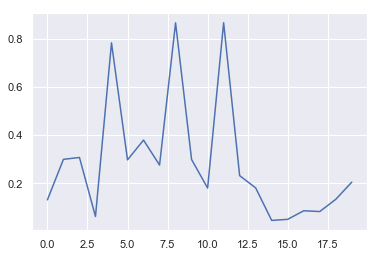

In [84]:
# plotting the graph for actual and predicted values
plt.plot(Y1.head(20))

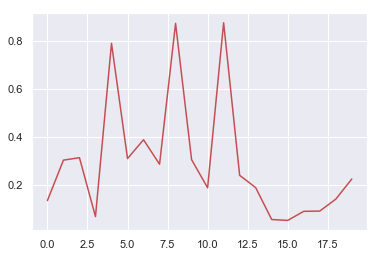

In [85]:
plt.plot(pred1.head(20) , color = 'r')
plt.show()


# Conclusion

1. House prices decreased from Year 2010 and further decreased in Year 2011. House prices picked up in Year 2012 past June


2. The best time to sell houses is from the month of June through October (inclusive). House prices are at a peak during these months across all years


3. The best time to buy a house is in the months of December and January


4. Out of the 3 above models for SARIMA,we can observe that the Model 1 with order = (2, 0, 4) and seasonal_order = (3, 1, 2,12)12 gives the lowest Mean squared error value of 0.174 and also the actual values are very much aligned with predicted values. Hence Model1 for SARIMA gives us the best results


5. As a part of our research, we implemented a hybrid of ARIMA and ANN and cocluded that the hybrid results gives a better result/forecasting value in comparison to the individual model's performance

# Citations


https://www.kaggle.com/rgrajan/time-series-exploratory-data-analysis-forecast

https://towardsdatascience.com/forecasting-with-prophet-d50bbfe95f91

https://www.kaggle.com/niyamatalmass/visualization-of-zillow-economics-data\

https://github.com/Kanav123/ArimaAnnHybrid

Definitions From -

https://www.sciencedirect.com/science/article/pii/S0925231201007020#SEC3

https://en.wikipedia.org/wiki/Artificial_neural_network

https://www.zillow.com/corp/About.htm
\
https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

https://facebook.github.io/prophet/

# Contribution

Code written by self :50 %

Code referred from outside sources :50%



# License


Copyright 2019 Ina Tayal, Prima Aranha, Sindhu Raghavendra

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.